In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns

In [3]:
dif_sta = {'TAM':6, 'GNB':21, 'NOR':26, 'KAN':31, 'BAL':18, 'WAS':15, 'NYJ':4, 'CIN':16, 'LAC':13, 'NWE':32, 'LAR':22,
           'MIN':29, 'IND':12, 'SEA':28, 'MIA':7, 'DEN':20, 'CAR':27, 'DAL':23, 'CHI':7, 'NYG':5, 'JAX':3, 'HOU':19,
           'OAK':9, 'PIT':30, 'ARI':17, 'ATL':24, 'BUF':10, 'CLE':1, 'PHI':25, 'DET':14, 'TEN':11, 'SFO':2}

In [6]:
dif_pass_def = {'TAM':7, 'GNB':21, 'NOR':4, 'KAN':2, 'BAL':28, 'WAS':18, 'NYJ':9, 'CIN':1, 'LAC':24, 'NWE':11, 'LAR':19,
           'MIN':30, 'IND':17, 'SEA':16, 'MIA':12, 'DEN':13, 'CAR':15, 'DAL':20, 'CHI':26, 'NYG':10, 'JAX':31, 'HOU':5,
           'OAK':14, 'PIT':23, 'ARI':29, 'ATL':6, 'BUF':1, 'CLE':8, 'PHI':3, 'DET':25, 'TEN':27, 'SFO':22}

In [7]:
def change_rank(x):
    return (-1*(x-32))+1

In [13]:
def clean_stats(run_stats, dic_def):
    run_stats = run_stats.rename({'Unnamed: 7': 'Where'}, axis=1) 
    result = []
    points_home = []
    points_away = []
    for x in run_stats.Result:
        result.append(x[0])
        reg1 = re.findall(r'\d*[^-]', x)
        points_home.append(reg1[2])
        points_away.append(reg1[3])
    run_stats['Result'] = result
    run_stats['Points_Team'] = points_home
    run_stats['Points_Opp'] = points_away
    run_stats.Where.fillna('home', inplace=True)
    run_stats2 = run_stats.reset_index(drop=True)
    stadium = [] 
    for i, x in enumerate(run_stats2.Where):
        if x == 'home':
            stadium.append(1)
        else:
            stadium.append(0)
    run_stats2['Where'] = stadium
    dif_list = []
    for i, x in enumerate(run_stats2.Where):
        if x == 0:
            dif_list.append(dif_sta[run_stats2.Opp[i]]+32)
        else:
            dif_list.append(change_rank(dif_sta[run_stats2.Tm[i]]))
    run_stats2['Stad_Diff'] = dif_list
    run_stats3 = run_stats2.drop(['Lg', 'Tm', 'G#', 'Rk', 'Pos', 'Age'], axis=1)
    run_stats3['Date'] = [x.month for x in run_stats3.Date]
    run_stats3['Date'] = run_stats3['Date'].map({9:'September', 10:'October', 11:'November', 12:'December'})
    run_stats3['Points_Team'] = pd.to_numeric(run_stats3.Points_Team, errors='coerce')
    run_stats3['Points_Opp'] = pd.to_numeric(run_stats3.Points_Opp, errors='coerce')
    run_stats3['Result'] = run_stats3.Result.map({'W':1, 'L':0, 'T':2})
    run_stats3['Opp'] = run_stats3['Opp'].map(dic_def)
    run_stats4 = run_stats3.set_index(['Week', 'Player'])
    run_stats5 = pd.get_dummies(run_stats4)
    return run_stats5

In [9]:
rec_stats = pd.read_excel('../data/rec/sportsref_rec1_18.xls')

In [11]:
for x in range(1,23):
    c = pd.read_excel(f'../data/rec/sportsref_download ({x}).xls', skiprows=1)
    rec_stats = pd.concat([rec_stats, c], ignore_index = True, sort=False)

In [23]:
rec_stats1 = rec_stats[rec_stats.Tgt >= 3]

In [24]:
rec_stats2 = clean_stats(rec_stats1, dif_pass_def)

In [25]:
rec_stats2.head()

Where  Opp  Result  Tgt  Rec  Yds    Y/R  TD  Ctch%  \
Week Player                                                                
1    Jared Cook          1   19       0   12    9  180  20.00   0  0.750   
     Michael Thomas      1    7       0   17   16  180  11.25   1  0.941   
     Tyreek Hill         0   24       1    8    7  169  24.14   2  0.875   
     Julio Jones         0    3       0   19   10  169  16.90   0  0.526   
     Mike Evans          0    4       1    7    7  147  21.00   1  1.000   

                     Y/Tgt  ...  Points_Opp  Stad_Diff  Date_December  \
Week Player                 ...                                         
1    Jared Cook      15.00  ...          33         24              0   
     Michael Thomas  10.59  ...          48          7              0   
     Tyreek Hill     21.13  ...          28         45              0   
     Julio Jones      8.89  ...          18         57              0   
     Mike Evans      21.00  ...          40         58              0   

                     Date_November  Date_October  Date_September  Day_Mon  \
Week Player                                                                 
1    Jared Cook                  0             0               1        1   
     Michael Thomas              0             0               1        0   
     Tyreek Hill                 0             0               1        0   
     Julio Jones                 0             0               1        0   
     Mike Evans                  0             0               1        0   

                     Day_Sat  Day_Sun  Day_Thu  
Week Player                                     
1    Jared Cook            0        0        0  
     Michael Thomas        0        1        0  
     Tyreek Hill           0        1        0  
     Julio Jones           0        0        1  
     Mike Evans            0        1        0  

[5 rows x 21 columns]

In [29]:
rec_stats3 = rec_stats2.drop(['Result', 'Tgt', 'Y/R','Rec', 'Yds', 'TD', 'Ctch%', 'Y/Tgt', 'Points_Opp'], axis=1)

In [30]:
rec_stats3.columns

Index(['Where', 'Opp', 'Points_Team', 'Stad_Diff', 'Date_December',
       'Date_November', 'Date_October', 'Date_September', 'Day_Mon', 'Day_Sat',
       'Day_Sun', 'Day_Thu'],
      dtype='object')

In [31]:
corr_rec = rec_stats3.corr()

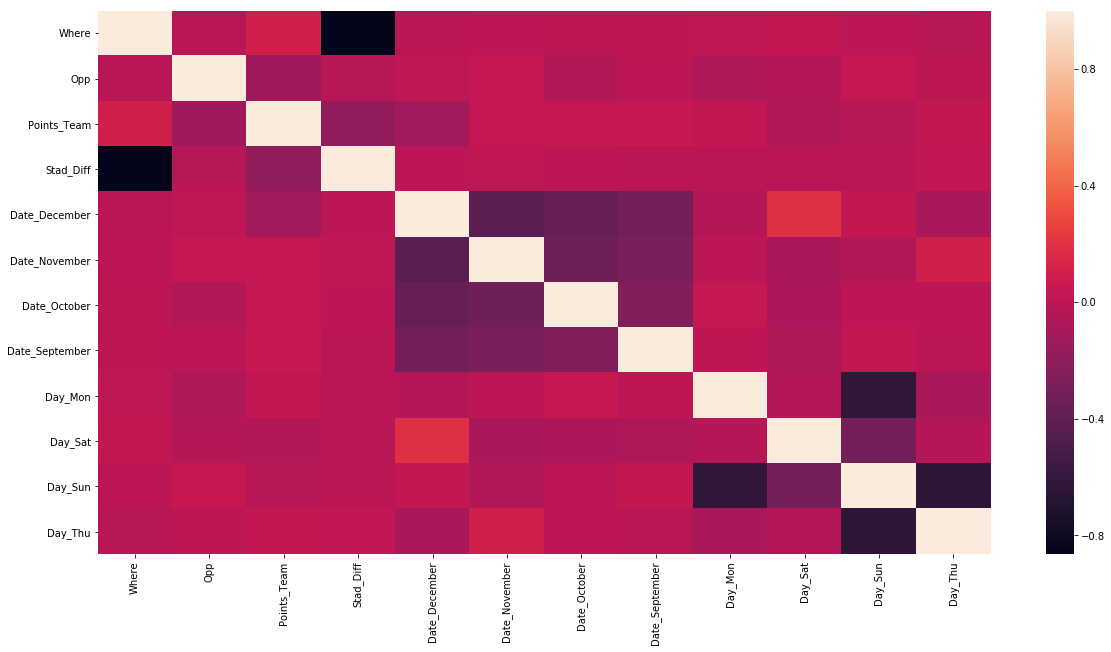

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
sns.heatmap(corr_rec, 
        xticklabels=corr_rec.columns,
        yticklabels=corr_rec.columns)

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [34]:
y = rec_stats3.Points_Team
X = rec_stats3.drop('Points_Team', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
pred_rec = linreg.predict(X_test)

In [36]:
mse = mean_squared_error(y_test, pred_rec)
rmse = mse**(1/2)
mae = mean_absolute_error(y_test, pred_rec)

In [37]:
print('rmse: ', rmse, '\n', 'mae:', mae)

rmse:  9.870317170231534 
 mae: 7.942589253129678
